# 7 Statistics with NumPy
## 7_7 Histograms in NumPy part 2
### Multidimensional Histogram and how to use them


#### numpy.histogram2d(x, y, bins=10, range=None, density=None, weights=None)
- Compute the bi-dimensional histogram of two data samples.
- Ex. X = A[0]; Y = A[1]
- We can use a 2D histogram to get an idea of how the values are spread out across the plain.
- You can think about it as a histogram on top of scatter plot

#### numpy.histogramdd(sample, bins=10, range=None, density=None, weights=None)
- Compute the multidimensional histogram of some data.
- sample(N, D) array, or (N, D) array_like:  The data to be histogrammed.
    - When an array, each row is a coordinate in a D-dimensional space - such as histogramdd(np.array([p1, p2, p3])).
    - When an array_like, each element is the list of values for single coordinate - such as histogramdd((X, Y, Z)).
    - The first form should be preferred.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.__version__

'1.26.4'

In [2]:
# Function show_attr

def show_attr(arrnm: str) -> str:
    strout = f' {arrnm}: '

    for attr in ('shape', 'ndim', 'size', 'dtype'):     #, 'itemsize'):
            arrnm_attr = arrnm + '.' + attr
            strout += f'| {attr}: {eval(arrnm_attr)} '

    return strout

In [3]:
# Function make a real density matrix

def direct_dm(dm: np.ndarray) -> np.ndarray:
    return np.array(list(map(lambda row: row[::-1], dm))).T

def direct_dm_b(dm: np.ndarray) -> np.ndarray:
    nf_arr = np.ones_like(dm)
    for ix in range(dm.shape[0]):
        nf_arr[ix] = dm[ix][::-1]
    return nf_arr.T

### dm_real = np.array(list(map(lambda row: row[::-1], dm))).T


In [4]:
A = np.array([[1,0,0,3,1],
              [3,6,6,2,9]])
#              [4,5,3,8,0]])

print(show_attr('A'))
A

 A: | shape: (2, 5) | ndim: 2 | size: 10 | dtype: int32 


array([[1, 0, 0, 3, 1],
       [3, 6, 6, 2, 9]])

In [5]:
# 2D Histogram: A[0] is X and A[1] is Y
# np.histogram2d(A[0], A[1])) - np.histogram2d(A[0], A[1], bins=4))
# Set the bin size to 4 so the output is more contained 
h2d = np.histogram2d(A[0], A[1], bins=4)
display(h2d)

# Tuple: One 2D array (Density) and two 1D arrays (bins edges on X and on Y)
# There is a slight twist when we look at the density array, the values we see in
# the first row of the density array include all points whose X value falls within
# the first bin. Density Matrix -> DM
# DM ROW -> X bin | DM COLUMN -> Y bin

# The '2.' we see in the third position (DM[0,2]) suggest that there are two
# points which feature in the first bin on the X axis and the third bin on the
# Y axis. 
display(h2d[0][0,2])
# Therefore, we are looking for points that have X coordinates between 0 and 0..75
# and Y coordinates between 5.5 and 7.25. Lopking at matrix A they are: in X the
# two 0 and in Y the two 6
print(f'One point (X=0, Y=6). X A[0,1]: {A[0,1]}, Y A[1,1]: {A[1,1]}')
print(f'Other point (X=0, Y=6). X A[0,2]: {A[0,2]}, Y A[1,2]: {A[1,2]}')

# 2nd row of DM will represent all the points tha have X coords between
# 0.75 and 1.5. the ones appear in first and last place meaning one of
# them has an Y coordinate between 2 and 3.75 and the other one between
# 7.25 and 9. [in A they ara (1,3) and (1,9)]
# The last point (las 1 in DM) is x bettween 2.25 and 3. and Y between
# 2 and 3.75 and is (3,2)

# The 2-D histogram might not be as easy to read, but it give us a good idea
# of how density is distributed among the two axis

# Hay un pequeño cambio cuando observamos la matriz de densidad, los valores que
# vemos en la primera fila de la matriz de densidad incluyen todos los puntos
# cuyo valor X cae dentro del primer contenedor

(array([[0., 0., 2., 0.],
        [1., 0., 0., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.]]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 array([2.  , 3.75, 5.5 , 7.25, 9.  ]))

2.0

One point (X=0, Y=6). X A[0,1]: 0, Y A[1,1]: 6
Other point (X=0, Y=6). X A[0,2]: 0, Y A[1,2]: 6


In [6]:
# Visualización using dircect_dm
np.array(list(map(lambda row: row[::-1], h2d[0]))).T

array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 1.]])

array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 1.]])

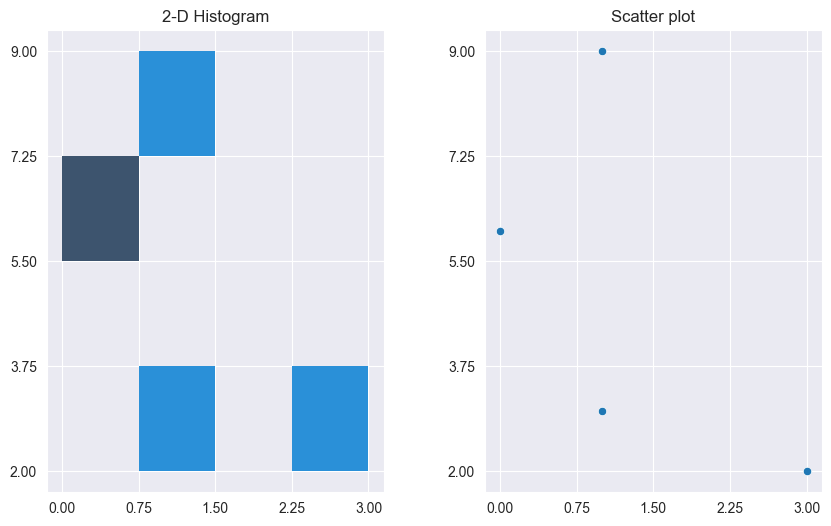

In [7]:
import seaborn as sns
sns.set_style('darkgrid')

fig, axs = plt.subplots(ncols=2, figsize=(10,6),)
plt.subplots_adjust(wspace=0.3)

h2dp = sns.histplot(x=A[0], y=A[1], ax=axs[0], bins=4)
h2dp.set(xticks=h2d[1], yticks=h2d[2])
h2dp.set_title('2-D Histogram')

sct = sns.scatterplot(x=A[0], y=A[1], ax=axs[1])
sct.set(xticks=h2d[1], yticks=h2d[2])
sct.set_title('Scatter plot')

display(np.array(list(map(lambda row: row[::-1], h2d[0]))).T)
plt.show()


In [8]:
# If we have input arrays of more than five values we get a better
# idea of just how useful it is.
from numpy.random import Generator as gen 
from numpy.random import PCG64 as pcg 

array_RG = gen(pcg())
B = array_RG.integers(low=21, high=50, size=(2,17))
display(B)

# h2d_b = np.histogram2d(B[0], B[1], bins=6)
# display(h2d_b)

# display(real_dm(h2d_b[0]))

# plt.Figure(figsize=(6,6))
# plt.scatter(x=B[0], y=B[1])


array([[48, 36, 43, 24, 37, 37, 33, 47, 37, 36, 36, 48, 29, 38, 39, 36,
        23],
       [41, 46, 46, 45, 36, 31, 42, 49, 45, 42, 35, 32, 33, 24, 29, 21,
        34]], dtype=int64)

## Exists Histograms of higher dimension than 2-D

In [9]:
# Re-defin matrix

M = np.array([[1,0,0,3,1],
              [3,6,6,2,9],
              [4,5,3,8,0]])

print(show_attr('M'))
M

 M: | shape: (3, 5) | ndim: 2 | size: 15 | dtype: int32 


array([[1, 0, 0, 3, 1],
       [3, 6, 6, 2, 9],
       [4, 5, 3, 8, 0]])

In [10]:
# If wue pass the entire matrix M transposed(), we´ll see that the output consists of four matrices
np.histogramdd(M.T, bins=4)
# There's a 2-D density array for each bin of the Z-coordinate array.
# If it helps you visualize this better, you can imagine we´re stacking the four density matrices to
# create a density tensor which depicts (representa) the density in three dimensions. 

(array([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 1., 1., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 1., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [1., 0., 0., 0.]],
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 0., 1.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]),
 [array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
  array([2.  , 3.75, 5.5 , 7.25, 9.  ]),
  array([0., 2., 4., 6., 8.])])

Histograms

histogram(a[, bins, range, density, weights])
Compute the histogram of a dataset.

histogram2d(x, y[, bins, range, density, ...])
Compute the bi-dimensional histogram of two data samples.

histogramdd(sample[, bins, range, density, ...])
Compute the multidimensional histogram of some data.

bincount(x, /[, weights, minlength])
Count number of occurrences of each value in array of non-negative ints.

histogram_bin_edges(a[, bins, range, weights])
Function to calculate only the edges of the bins used by the histogram function.

digitize(x, bins[, right])
Return the indices of the bins to which each value in input array belongs.